In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df =pd.read_csv(r'C:\Users\HARSHIT JAIN\Desktop\data science projects\Real_Estate_Data_science_Project\DATASETS\gurgoan_properties_cleaned_v2\gurgaon_properties_cleaned_v2.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,falt,dlf park place,sector 54,5.75,24688.0,2329.0,Super Built up area 2329(216.37 sq.m.)Built Up...,3,4,3,12.0,North-East,Relatively New,2329.0,1900.0,1700.0,0,1,0,0,0,2,174
1,falt,palam vihar society,sector 2,3.35,7444.0,4500.0,Carpet area: 4500 (418.06 sq.m.),4,4,3+,2.0,NaN,New Property,NaN,NaN,4500.0,1,0,0,0,0,1,66
2,falt,tulip violet,sector 69,1.40,8856.0,1581.0,Super Built up area 1578(146.6 sq.m.),3,3,2,9.0,West,Relatively New,1578.0,NaN,NaN,0,0,0,1,0,1,120
3,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,0,0
4,falt,m3m golf hills phase 1,sector 79,1.70,10828.0,1570.0,Built Up area: 1570 (145.86 sq.m.)Carpet area:...,3,2,3,10.0,NaN,Undefined,NaN,1570.0,1099.0,0,0,0,0,0,1,0


In [5]:
df.duplicated().sum()

124

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(3678, 23)

In [8]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqrt', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

# outliers on the basis of price column

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

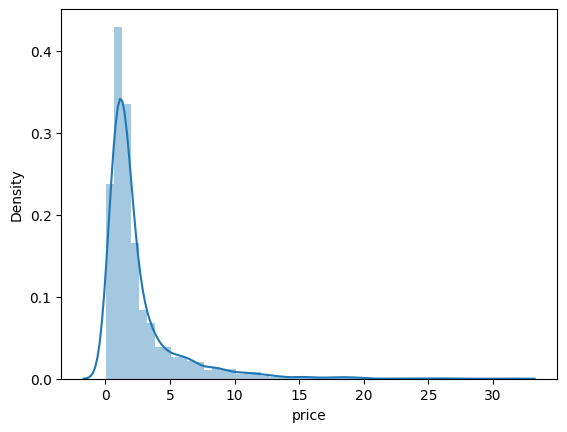

In [9]:
sns.distplot(df['price'])

<Axes: >

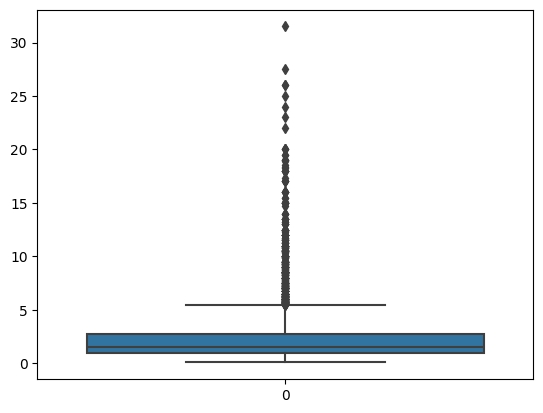

In [10]:
sns.boxplot(df['price'])

In [11]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [12]:
outliers.sort_values('price',ascending=False).head(10)

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1557,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.5,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
1537,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,0,42
974,house,dlf city plots,sector 26,26.0,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,0,138
3404,house,independent,sector 26,26.0,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
163,house,suncity township,sector 54,25.0,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,1,0
758,house,emaar the palm springs,sector 54,24.0,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,0,122
3703,house,independent,sector 26,23.0,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,0,145
547,house,vipul tatvam villa,sector 48,22.0,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,1,54
1401,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
2534,house,dlf city plots,sector 26,20.0,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,0,153


##  on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

# price_per_sqrt

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\2233735473.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqrt'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqrt', ylabel='Density'>

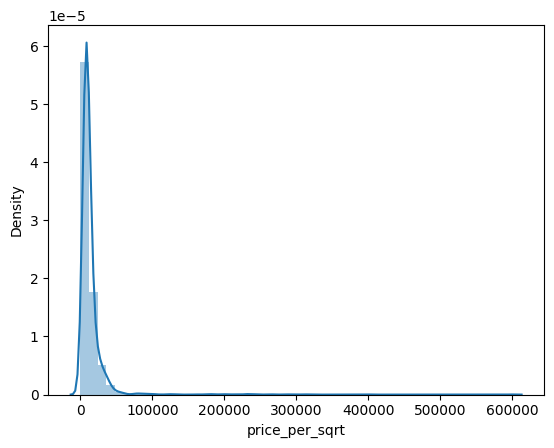

In [13]:
sns.distplot(df['price_per_sqrt'])

<Axes: >

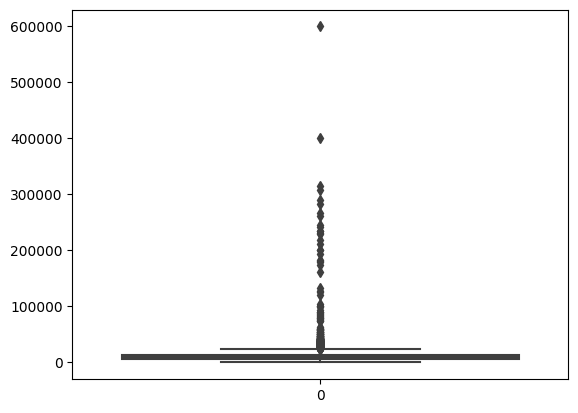

In [14]:
sns.boxplot(df['price_per_sqrt'])

In [15]:
Q1 = df['price_per_sqrt'].quantile(.25)
Q3 = df['price_per_sqrt'].quantile(.75)

IQR = Q3 - Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

outliers_sqrt = df[(df['price_per_sqrt']<lower_bound)|(df['price_per_sqrt']>upper_bound)]

num_outliers = outliers.shape[0]

outliers_price_per_sqrt_stats = outliers['price_per_sqrt'].describe()

num_outliers,outliers_price_per_sqrt_stats

(425,
 count       425.000000
 mean      36456.475294
 std       51784.501266
 min        1560.000000
 25%       19488.000000
 50%       26389.000000
 75%       35222.000000
 max      600000.000000
 Name: price_per_sqrt, dtype: float64)

In [16]:
outliers_sqrt

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,falt,dlf park place,sector 54,5.75,24688.0,2329.0,Super Built up area 2329(216.37 sq.m.)Built Up...,3,4,3,12.0,North-East,Relatively New,2329.0,1900.0,1700.0,0,1,0,0,0,2,174
15,house,emaar emerald hills,sector 65,12.50,34722.0,3600.0,Plot area 400(334.45 sq.m.),4,4,3+,2.0,East,Relatively New,NaN,3600.0,NaN,1,1,0,0,0,1,56
70,house,independent,sector 43,2.50,25960.0,963.0,Plot area 107(89.47 sq.m.),7,7,3,4.0,West,Relatively New,NaN,963.0,NaN,0,0,0,0,1,2,20
76,house,independent,sector 4,0.58,86567.0,67.0,Plot area 67(6.22 sq.m.),2,2,1,2.0,West,Moderately Old,NaN,67.0,NaN,0,0,0,1,1,1,7
88,falt,dlf the belaire,sector 54,10.00,24557.0,4072.0,Super Built up area 4072(378.3 sq.m.)Built Up ...,4,5,3+,17.0,North,Moderately Old,4072.0,3000.0,2800.0,0,1,0,0,0,2,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,falt,central park resorts,sector 48,9.30,24926.0,3731.0,Super Built up area 3931(365.2 sq.m.)Built Up ...,4,4,3+,10.0,North-East,Moderately Old,3931.0,3831.0,3731.0,1,1,1,1,0,0,67
3779,house,dlf city plots,sector 26,17.00,37627.0,4518.0,Plot area 502(419.74 sq.m.),5,6,3,2.0,North-West,Old Property,NaN,4518.0,NaN,0,1,1,1,0,0,87
3793,house,independent,sector 26,13.50,29880.0,4518.0,Plot area 502(419.74 sq.m.),5,5,3+,2.0,North-East,Relatively New,NaN,4518.0,NaN,1,1,0,1,1,2,49
3794,house,dlf city plots phase 2,sector 25,4.50,33333.0,1350.0,Plot area 150(125.42 sq.m.),5,3,2,3.0,NaN,Old Property,NaN,1350.0,NaN,0,0,1,1,0,1,25


In [17]:
outliers_sqrt['area'] = outliers_sqrt['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\1924766153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqrt['area'] = outliers_sqrt['area'].apply(lambda x:x*9 if x<1000 else x)


In [18]:
outliers_sqrt['price_per_sqrt'] = round((outliers_sqrt['price']*10000000)/outliers_sqrt['area'])

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\2916776279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqrt['price_per_sqrt'] = round((outliers_sqrt['price']*10000000)/outliers_sqrt['area'])


In [19]:
outliers_sqrt['price_per_sqrt'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqrt, dtype: float64

In [20]:
df.update(outliers_sqrt)

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\2233735473.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqrt'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqrt', ylabel='Density'>

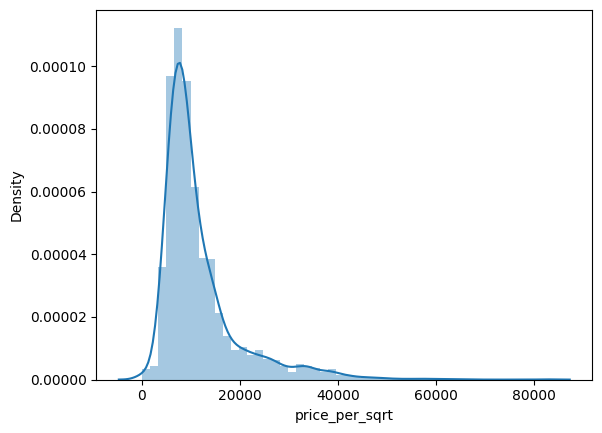

In [21]:
sns.distplot(df['price_per_sqrt'])

<Axes: xlabel='price_per_sqrt'>

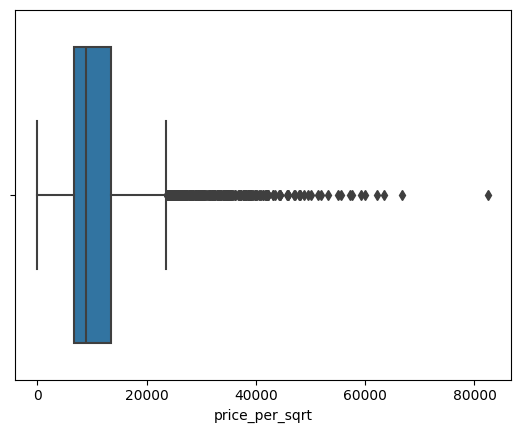

In [22]:
sns.boxplot(x=df['price_per_sqrt'])

In [23]:
df[df['price_per_sqrt']>50000]

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
327,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,1,0
563,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,0,160
692,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,2,137
758,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,0,122
797,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,0,153
974,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,0,138
1132,falt,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,1,0
1228,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,1,0
1664,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,0,99
2127,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,0,103


In [24]:
df = df[df['price_per_sqrt'] <= 50000]

<Axes: xlabel='price_per_sqrt'>

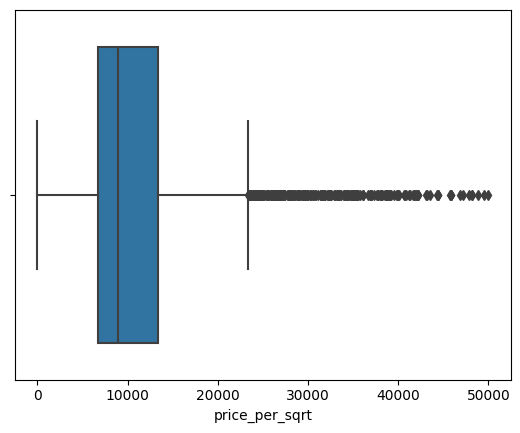

In [25]:
sns.boxplot(x=df['price_per_sqrt'])

# Area

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

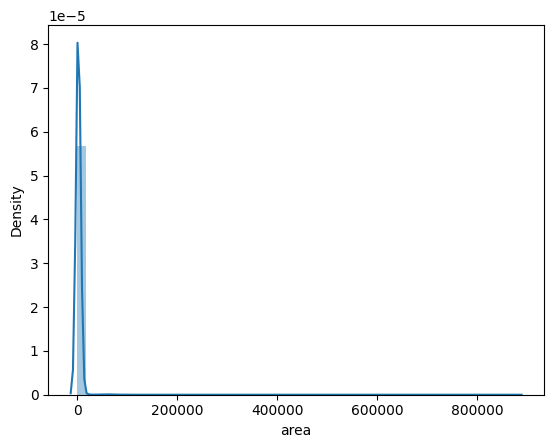

In [26]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

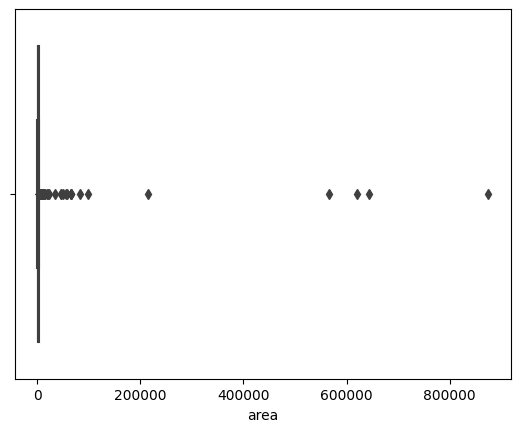

In [27]:
sns.boxplot(x=df['area'])

In [28]:
df['area'].describe()

count      3648.000000
mean       2946.982182
std       23205.053698
min         145.000000
25%        1261.750000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [29]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
384,falt,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,1,44
945,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,0,0
1206,falt,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
3207,falt,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,1,76
3584,falt,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,1,65


In [30]:
df = df[df['area'] < 100000]

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

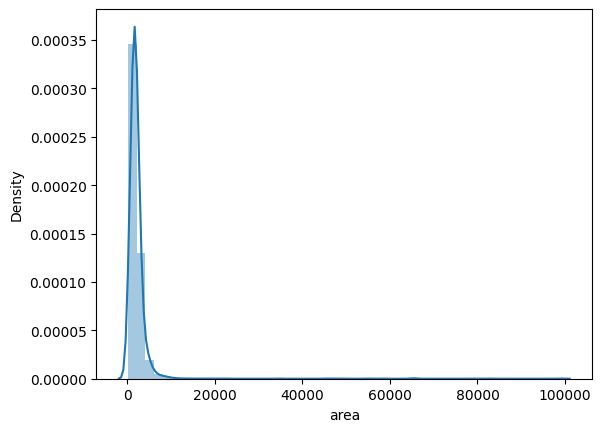

In [31]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

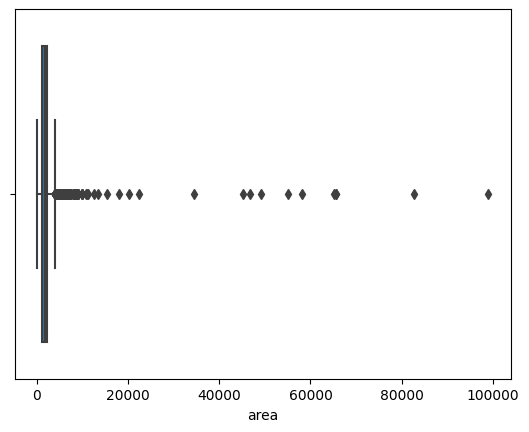

In [32]:
sns.boxplot(x=df['area'])

In [35]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 1259, 3588, 648, 2106, 2247, 16, 187, 356, 3394

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1259,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,0,60
1834,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
3588,falt,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,1,15
648,falt,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,1,51
3473,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,1,0
2106,falt,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,1,15
2247,falt,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,1,37
16,falt,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,1,37
3325,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,0,109
187,falt,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,1,33


In [36]:
df.drop(index=[1259, 3588, 648, 2106, 2247, 16, 187, 356, 3394], inplace=True)

In [37]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1834,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
3473,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,1,0
3325,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,0,109
1479,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,0,61
3636,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,0,123
2388,falt,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Undefined,NaN,NaN,18122.00,1,0,0,1,1,0,44
1451,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,1,160
2844,falt,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,1,55
1537,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,0,42
2668,falt,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,1,60


In [38]:
df.loc[1834,'area'] = 115*9
df.loc[3473,'area'] = 7250
df.loc[3325,'area'] = 5800
df.loc[1479,'area'] = 2660
df.loc[3636,'area'] = 2850
df.loc[2388,'area'] = 1812
df.loc[1451,'area'] = 2160
df.loc[2844,'area'] = 1175

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

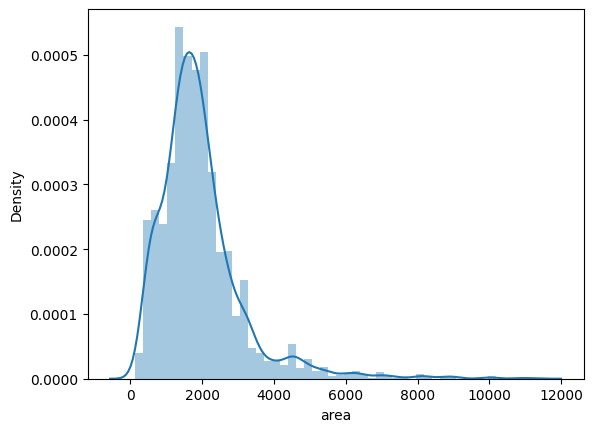

In [39]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

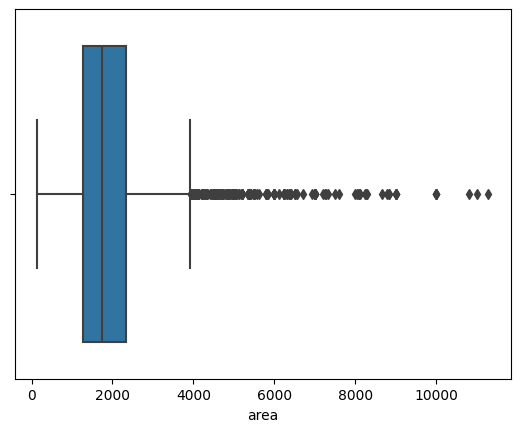

In [40]:
sns.boxplot(x=df['area'])

In [41]:
df['area'].describe()

count     3634.000000
mean      1949.887177
std       1215.840302
min        145.000000
25%       1260.000000
50%       1746.500000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

# 	bedroom

C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


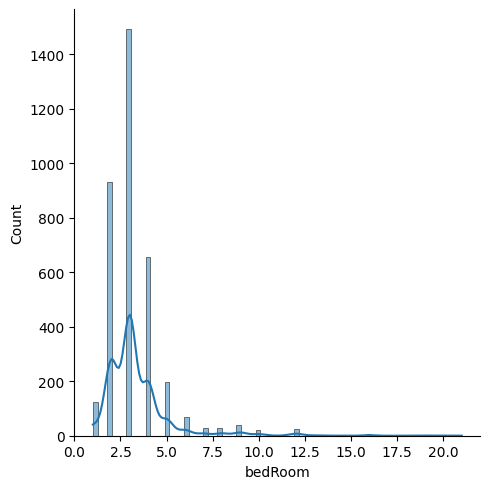

In [49]:
sns.displot(df['bedRoom'],kde = True)

<Axes: xlabel='bedRoom'>

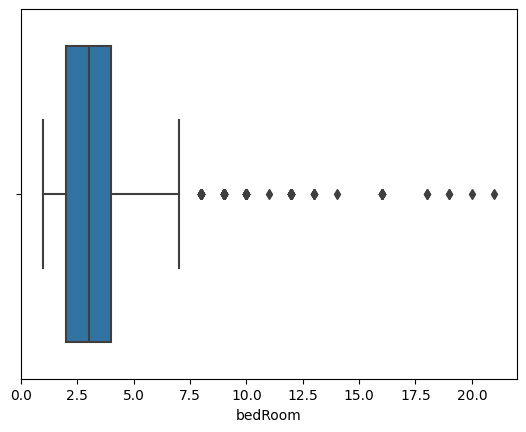

In [50]:
sns.boxplot(x=df['bedRoom'])

In [51]:
df['bedRoom'].describe()

count    3634.000000
mean        3.332966
std         1.830192
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [55]:
df[df['bedRoom'] > 10].sort_values('bedRoom', ascending=False)

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
271,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49
1382,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,2,22
2407,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,1,74
3434,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,1,68
2887,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57
1899,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
2314,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16,18,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0,1,0,1,0,0,49
2451,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,0,1,0,0,49
771,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16,16,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1,1,0,1,1,1,41
865,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16,16,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,0,20


In [56]:
df = df[df['bedRoom'] <= 10]

In [57]:
df.shape

(3589, 23)

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Density'>

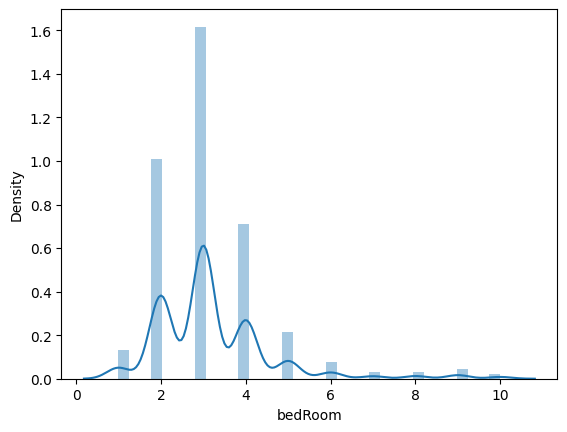

In [58]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

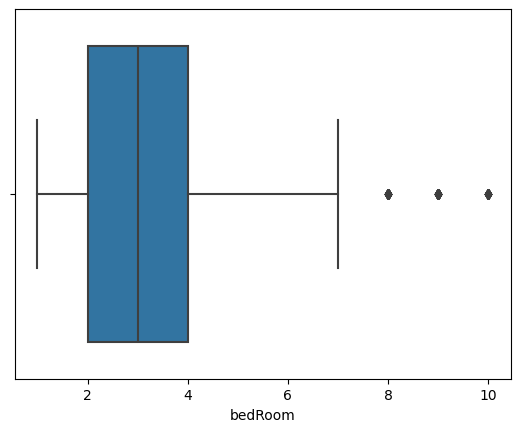

In [59]:
sns.boxplot(x=df['bedRoom'])

In [60]:
df['bedRoom'].describe()

count    3589.000000
mean        3.203121
std         1.394259
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

# Bathroom

C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


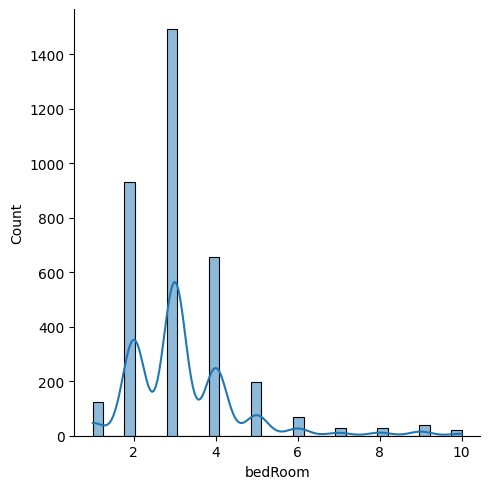

In [61]:
sns.displot(df['bedRoom'],kde = True)

<Axes: xlabel='bathroom'>

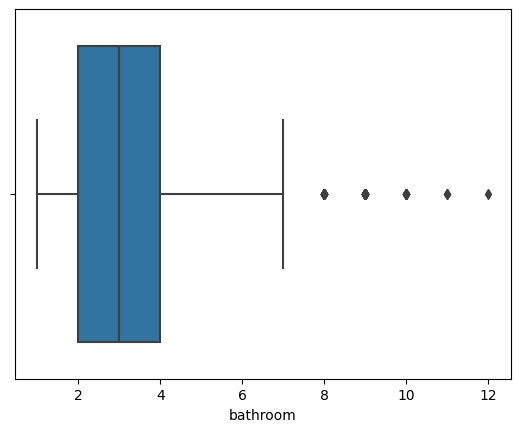

In [62]:
sns.boxplot(x=df['bathroom'])

In [63]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2130,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,0,146
2713,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38
3155,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,0,39


# super built up area

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='super_built_up_area', ylabel='Density'>

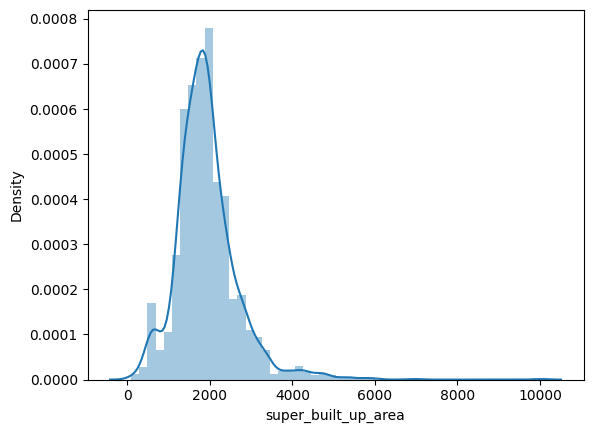

In [64]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

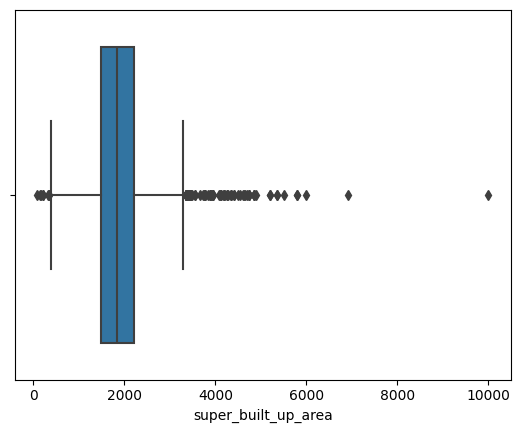

In [65]:
sns.boxplot(x=df['super_built_up_area'])

In [66]:
df['super_built_up_area'].describe()

count     1874.000000
mean      1924.877561
std        764.217034
min         89.000000
25%       1479.250000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [67]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2139,falt,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,0,140
2463,falt,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,1,49


# built up area

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='built_up_area', ylabel='Density'>

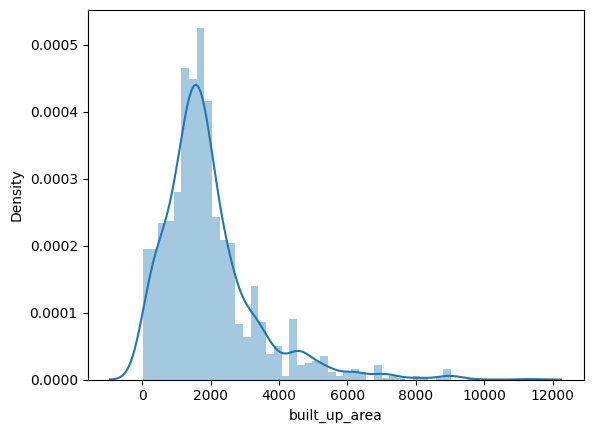

In [68]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

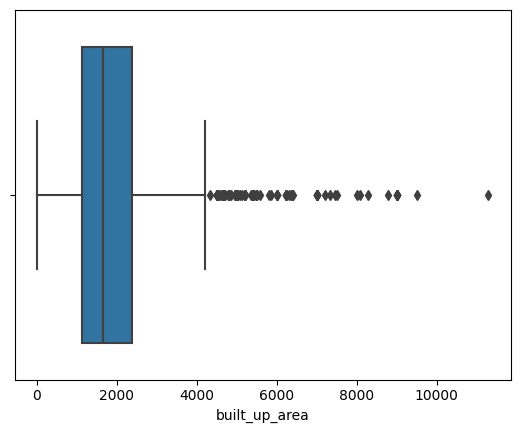

In [69]:
sns.boxplot(x=df['built_up_area'])

In [70]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1537,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,0,42


# carpet area

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carpet_area', ylabel='Density'>

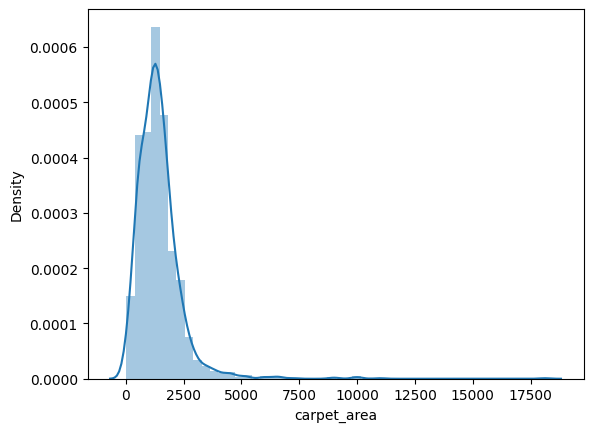

In [71]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

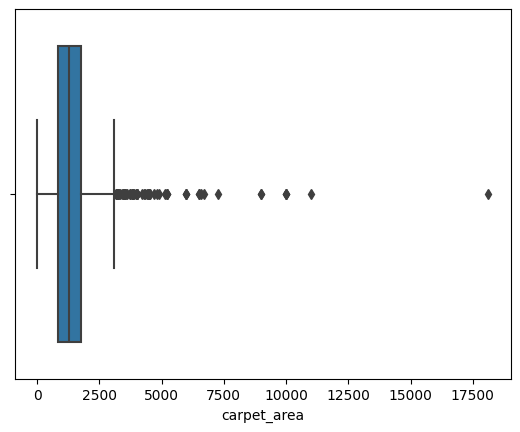

In [72]:
sns.boxplot(x=df['carpet_area'])

In [73]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2388,falt,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,1,0,0,1,1,0,44
2668,falt,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,1,60


In [74]:
df.loc[2388,'carpet_area'] = 1812

In [75]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2668,falt,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,1,60


# luxury_score

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='luxury_score', ylabel='Density'>

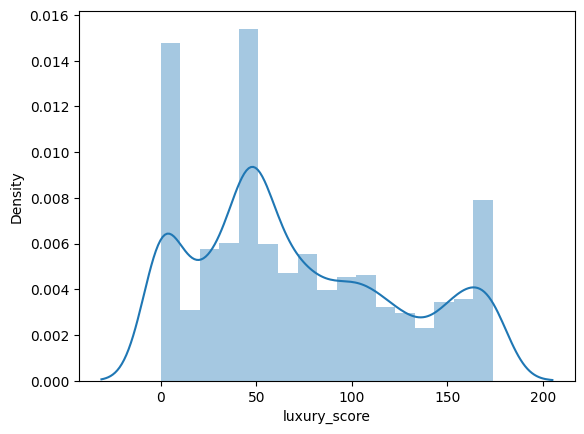

In [76]:
sns.distplot(df['luxury_score'])

<Axes: >

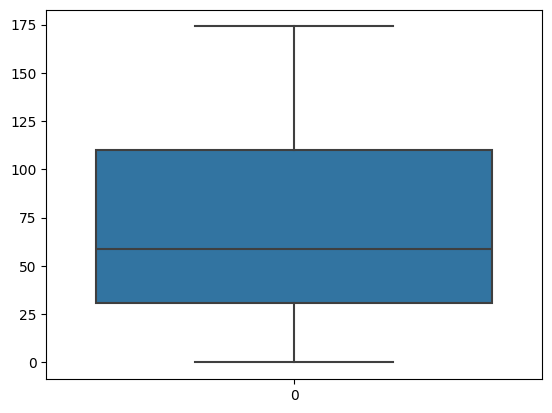

In [77]:
sns.boxplot(df['luxury_score'])

In [78]:
df.shape

(3589, 23)

In [79]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\3958460563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = round((df['price']*10000000)/df['area'])


In [80]:
df.head()

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_per_sqft
0,falt,dlf park place,sector 54,5.75,24689.0,2329.0,Super Built up area 2329(216.37 sq.m.)Built Up...,3,4,3,12.0,North-East,Relatively New,2329.0,1900.0,1700.0,0,1,0,0,0,2,174,24689.0
1,falt,palam vihar society,sector 2,3.35,7444.0,4500.0,Carpet area: 4500 (418.06 sq.m.),4,4,3+,2.0,NaN,New Property,NaN,NaN,4500.0,1,0,0,0,0,1,66,7444.0
2,falt,tulip violet,sector 69,1.40,8856.0,1581.0,Super Built up area 1578(146.6 sq.m.),3,3,2,9.0,West,Relatively New,1578.0,NaN,NaN,0,0,0,1,0,1,120,8855.0
3,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,0,0,12444.0
4,falt,m3m golf hills phase 1,sector 79,1.70,10828.0,1570.0,Built Up area: 1570 (145.86 sq.m.)Carpet area:...,3,2,3,10.0,NaN,Undefined,NaN,1570.0,1099.0,0,0,0,0,0,1,0,10828.0


C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

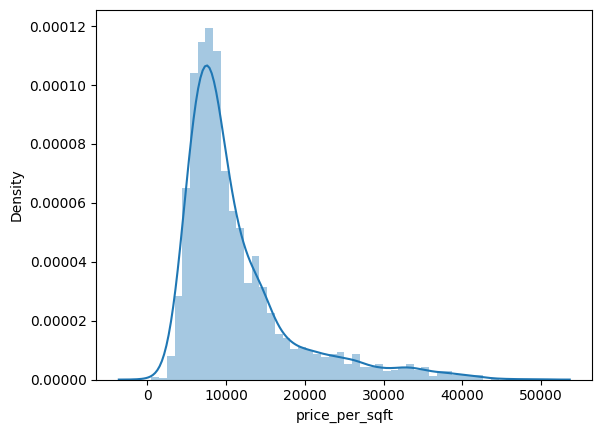

In [81]:
sns.distplot(df['price_per_sqft'])

<Axes: >

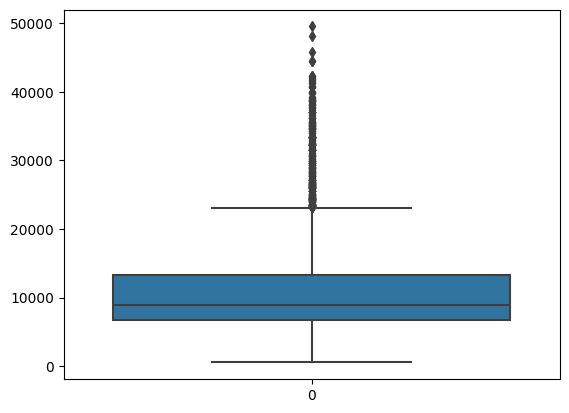

In [82]:
sns.boxplot(df['price_per_sqft'])

In [83]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_per_sqft
446,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,2,0,45710.0
1162,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,0,88,42222.0
1401,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97,44444.0
1793,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,0,103,42222.0
2095,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,0,60,42194.0
2657,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,1,0,49500.0
2899,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,0,44,44444.0
3417,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,0,121,42054.0
3550,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,0,7,48148.0


In [86]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

250.5

In [87]:
df[(df['area']/df['bedRoom'])<250]

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_per_sqft
3,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,0,0,12444.0
23,falt,signature global solera,sector 107,0.50,7751.0,645.0,Carpet area: 645 (59.92 sq.m.),3,2,2,6.0,North-East,Relatively New,NaN,NaN,645.0,0,0,0,0,1,1,49,7752.0
28,falt,pyramid urban homes 2,sector 86,0.41,8283.0,495.0,Carpet area: 501 (46.54 sq.m.),2,2,1,7.0,West,New Property,NaN,NaN,501.0,1,1,0,1,1,1,49,8283.0
34,house,independent,sector 7,1.16,11693.0,992.0,Plot area 992(92.16 sq.m.)Carpet area: 992 sq....,5,4,2,3.0,North-East,Moderately Old,NaN,NaN,992.0,0,0,0,0,1,1,39,11694.0
38,house,sai kripa floors 5,sector 11,0.90,11250.0,800.0,Plot area 800(74.32 sq.m.),5,5,3,3.0,NaN,Relatively New,NaN,800.0,NaN,0,0,0,0,0,1,0,11250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,house,independent,sector 28,0.75,20833.0,360.0,Plot area 40(33.45 sq.m.),7,4,3+,4.0,NaN,Moderately Old,NaN,360.0,NaN,0,0,0,0,0,1,7,20833.0
3605,house,independent,manesar,1.10,6172.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,1,0,6173.0
3653,house,huda floor,sector 38,4.00,22222.0,1800.0,Plot area 1800(167.23 sq.m.)Built Up area: 480...,9,9,3+,2.0,East,Relatively New,NaN,4800.0,3800.0,0,0,1,1,0,0,152,22222.0
3688,house,independent,sector 3,0.80,8155.0,981.0,Plot area 109(91.14 sq.m.),5,4,1,2.0,NaN,Moderately Old,NaN,981.0,NaN,0,0,0,0,0,1,0,8155.0


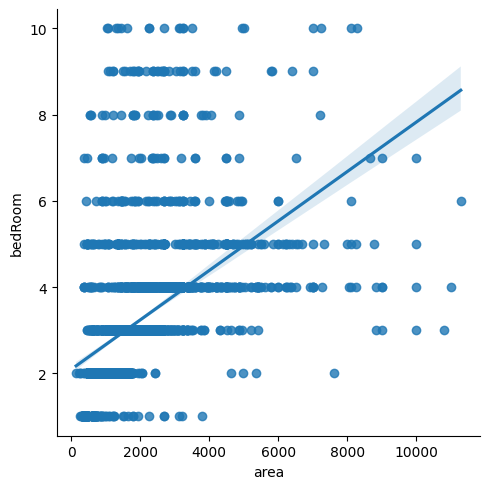

In [88]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [90]:
df['aera_room_ratio'] = df['area']/df['bedRoom']

In [93]:
(df[df['aera_room_ratio'] < 250])['bedRoom'].value_counts()

bedRoom
2     47
3     33
5     28
6     17
4     17
9     15
8     12
10     8
7      8
Name: count, dtype: int64

In [95]:
df = df[df['aera_room_ratio'] > 100]

In [100]:
outliers_df =df[(df['aera_room_ratio'] < 250) &(df['bedRoom'] > 3)]

In [101]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\3450078040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [102]:
df.update(outliers_df)

In [103]:
df['aera_room_ratio'] = df['area']/df['bedRoom']

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_12024\3665930747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aera_room_ratio'] = df['area']/df['bedRoom']


In [104]:
df[(df['aera_room_ratio'] < 250) &(df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_per_sqft,aera_room_ratio
3,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,0,0,12444.0,225.000000
492,house,independent,sector 12,2.50,13888.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,1,8,13889.0,200.000000
711,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,1,29,14096.0,120.600000
1088,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,1,0,12222.0,150.000000
1519,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,1,0,11717.0,198.000000
1531,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,1,0,10000.0,220.000000
1722,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,1,0,9444.0,180.000000
1732,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,1,0,5664.0,113.000000
2085,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,1,0,9074.0,120.000000
2155,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,1,0,6500.0,166.666667


In [107]:
df[(df['aera_room_ratio'] < 250) &(df['bedRoom'] > 4)].shape

(13, 25)

In [108]:
df.shape

(3569, 25)

In [110]:
df = df[~((df['aera_room_ratio'] < 250) &(df['bedRoom'] > 4))]

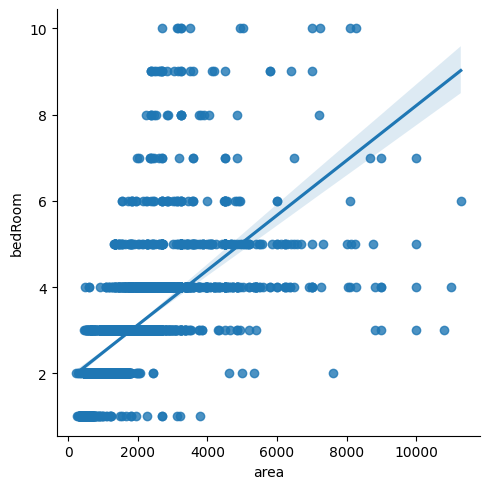

In [111]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [112]:
df.shape

(3556, 25)

In [113]:
df.head()

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_per_sqft,aera_room_ratio
0,falt,dlf park place,sector 54,5.75,24689.0,2329.0,Super Built up area 2329(216.37 sq.m.)Built Up...,3,4,3,12.0,North-East,Relatively New,2329.0,1900.0,1700.0,0,1,0,0,0,2,174,24689.0,776.333333
1,falt,palam vihar society,sector 2,3.35,7444.0,4500.0,Carpet area: 4500 (418.06 sq.m.),4,4,3+,2.0,NaN,New Property,NaN,NaN,4500.0,1,0,0,0,0,1,66,7444.0,1125.000000
2,falt,tulip violet,sector 69,1.40,8856.0,1581.0,Super Built up area 1578(146.6 sq.m.),3,3,2,9.0,West,Relatively New,1578.0,NaN,NaN,0,0,0,1,0,1,120,8855.0,527.000000
4,falt,m3m golf hills phase 1,sector 79,1.70,10828.0,1570.0,Built Up area: 1570 (145.86 sq.m.)Carpet area:...,3,2,3,10.0,NaN,Undefined,NaN,1570.0,1099.0,0,0,0,0,0,1,0,10828.0,523.333333
5,falt,godrej nature plus,sector 33,1.35,8670.0,1557.0,Super Built up area 1557(144.65 sq.m.),3,2,3+,17.0,NaN,New Property,1557.0,NaN,NaN,0,0,0,0,0,1,38,8671.0,519.000000


In [114]:
df.to_csv('gurgaon_properties_outlier-treated.csv',index=False)